In [11]:
import matplotlib.pyplot as plt
import json

train_entailment_loss_path = "train_entailment_loss_10000.json"
triggers_length_1_path = "5_triggers_len_1_entailment_to_contradiction_stats.json"
triggers_length_2_path = "5_triggers_len_2_entailment_to_contradiction_stats.json"
triggers_length_3_path = "5_triggers_len_3_entailment_to_contradiction_stats.json"
triggers_length_4_path = "5_triggers_len_4_entailment_to_contradiction_stats.json"
triggers_length_5_path = "5_triggers_len_5_entailment_to_contradiction_stats.json"

# alien_length_stats_path = "alien_entailment_to_contradiction_stats.json"
# mars_length_stats_path = "mars_entailment_to_contradiction_stats.json"
# nobody_length_stats_path = "nobody_entailment_to_contradiction_stats.json"
# train_entailment_loss_path = "train_entailment_loss_2000.json"

In [8]:
def get_data_for_plot(data_file_path):
    with open(data_file_path, 'r') as f:
        data = json.load(f)
        
    mean_list, std_top_line, std_bottom_line = [], [], []
    sentences_len_list = list(sorted([int(key_len) for key_len in data.keys()]))
    sentences_len_list = list(filter(lambda x: x <= 20, sentences_len_list))
    for len_key in sentences_len_list:
        len_key_data = data[str(len_key)]
        mean_list.append(len_key_data["mean"])
        std_top_line.append(len_key_data["mean"] + len_key_data["std"])
        std_bottom_line.append(len_key_data["mean"] - len_key_data["std"])
    return sentences_len_list, mean_list, std_bottom_line, std_top_line

In [25]:
sentences_len_list_train_stats, mean_list_train_stats, std_bottom_line_train_stats, std_top_line_train_stats =  get_data_for_plot(train_entailment_loss_path)
sentences_triggers_length_1_list, mean_list_triggers_length_1, std_bottom_line_triggers_length_1, std_top_line_triggers_length_1 = get_data_for_plot(triggers_length_1_path)
sentences_triggers_length_2_list, mean_list_triggers_length_2, std_bottom_line_triggers_length_2, std_top_line_triggers_length_2 = get_data_for_plot(triggers_length_2_path)
sentences_triggers_length_3_list, mean_list_triggers_length_3, std_bottom_line_triggers_length_3, std_top_line_triggers_length_3 = get_data_for_plot(triggers_length_3_path)
sentences_triggers_length_4_list, mean_list_triggers_length_4, std_bottom_line_triggers_length_4, std_top_line_triggers_length_4 = get_data_for_plot(triggers_length_4_path)
sentences_triggers_length_5_list, mean_list_triggers_length_5, std_bottom_line_triggers_length_5, std_top_line_triggers_length_5 = get_data_for_plot(triggers_length_5_path)

# sentences_len_list_alien, mean_list_alien, std_bottom_line_alien, std_top_line_alien =  get_data_for_plot(alien_length_stats_path)
# sentences_len_list_mars, mean_list_mars, std_bottom_line_mars, std_top_line_mars =  get_data_for_plot(mars_length_stats_path)
# sentences_len_list_nobody, mean_list_nobody, std_bottom_line_nobody, std_top_line_nobody =  get_data_for_plot(nobody_length_stats_path)



# sentences_len_all_lists = [sentences_triggers_length_1_list, sentences_triggers_length_2_list, sentences_triggers_length_3_list, sentences_triggers_length_4_list, sentences_triggers_length_5_list]
# mean_all_lists = [mean_list_triggers_length_1, mean_list_triggers_length_2, mean_list_triggers_length_3, mean_list_triggers_length_4, mean_list_triggers_length_5]
# std_bottom_line_all_lists = [std_bottom_line_triggers_length_1, std_bottom_line_triggers_length_2, std_bottom_line_triggers_length_3, std_bottom_line_triggers_length_4, std_bottom_line_triggers_length_5]
# std_top_line_all_lists = [std_top_line_triggers_length_1, std_top_line_triggers_length_2, std_top_line_triggers_length_3, std_top_line_triggers_length_4, std_top_line_triggers_length_5]
# color_list = ["brown", "green", "blue", "gray", "red"]
# labels_list = ["one trigger", "two triggers", "three triggers", "four triggers", "five triggers"]
# 

sentences_len_all_lists = [sentences_len_list_train_stats, sentences_triggers_length_1_list]
mean_all_lists = [mean_list_train_stats, mean_list_triggers_length_1]
std_bottom_line_all_lists = [std_bottom_line_train_stats, std_bottom_line_triggers_length_1]
std_top_line_all_lists = [std_top_line_train_stats, std_top_line_triggers_length_1]
color_list = ["blue", "brown"]
labels_list = ["training data stats (10000)", "one trigger"]


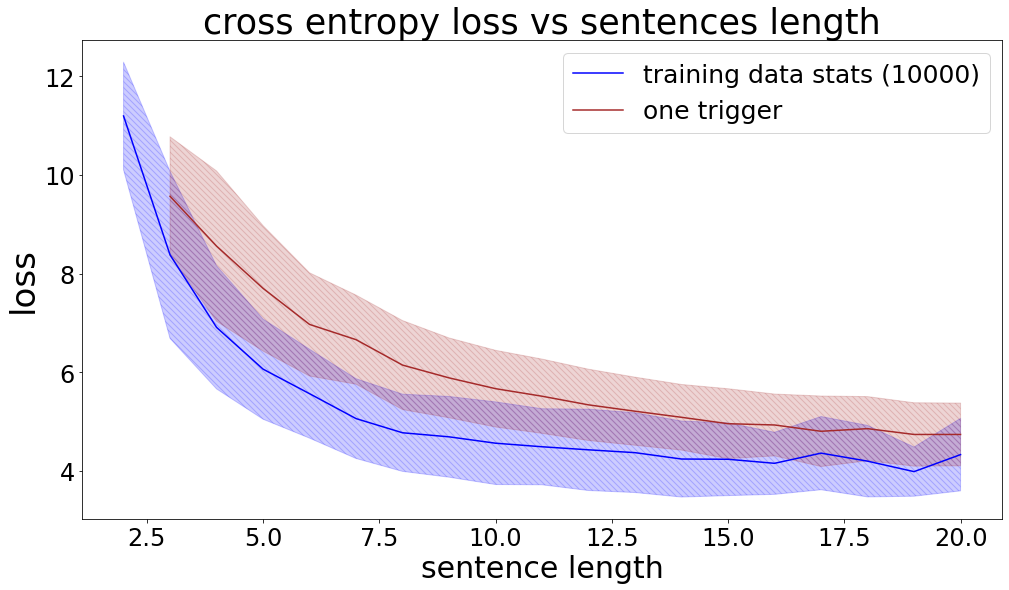

In [26]:
title = "cross entropy loss vs sentences length"
fig, ax = plt.subplots(figsize=(16.5,8.8))
plt.title(title, fontsize=35)
plt.xlabel("sentence length", fontsize=30)
plt.ylabel("loss", fontsize=34)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
for i in range(len(sentences_len_all_lists)):   
    ax.plot(sentences_len_all_lists[i], mean_all_lists[i], color_list[i], label=labels_list[i])
    plt.legend(loc="upper right", prop={'size': 25})
    ax.fill_between(sentences_len_all_lists[i], std_bottom_line_all_lists[i], std_top_line_all_lists[i], alpha=0.2, color=color_list[i], hatch="\\\\\\\\")

plt.savefig("loss_compare.png")
plt.show()

